In [24]:
#Basic scientific python libs
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt

import seaborn as sns
import datetime 
from sklearn import preprocessing


In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [6]:
df['month'] = pd.DatetimeIndex(df['Date']).month

In [7]:
df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 27 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

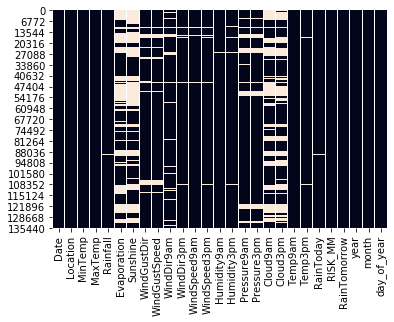

In [9]:

sns.heatmap(df.isnull(), cbar=False)


In [10]:
df.Evaporation.value_counts()

4.0     3282
8.0     2574
2.2     2057
2.0     1996
2.6     1975
        ... 
42.4       1
56.2       1
36.8       1
16.5       1
44.0       1
Name: Evaporation, Length: 356, dtype: int64

In [11]:
df.Evaporation.sort_values()

74658     0.0
35304     0.0
57022     0.0
83398     0.0
63636     0.0
         ... 
142188    NaN
142189    NaN
142190    NaN
142191    NaN
142192    NaN
Name: Evaporation, Length: 142193, dtype: float64

In [12]:
df.loc[(df.RainToday != "Yes"),'RainToday']=0
df.loc[(df.RainToday  ==  "Yes"),'RainToday']=1
df.loc[(df.RainTomorrow != "Yes"),'RainTomorrow']=0
df.loc[(df.RainTomorrow  ==  "Yes"),'RainTomorrow']=1

# For better visualization of the relationship creating a dataset of a particuar location for a particular month 

In [13]:
df1=df[df['Location']=='Albury']

In [14]:
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day_of_year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,0,0.0,0,2008,12,336
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,0,0.0,0,2008,12,337
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,0,0.0,0,2008,12,338
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,0,1.0,0,2008,12,339
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,0,0.2,0,2008,12,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,2017-06-21,Albury,1.2,15.2,0.4,NaN,NaN,ENE,15.0,NaN,...,8.0,NaN,2.9,14.3,0,0.0,0,2017,6,172
3007,2017-06-22,Albury,0.8,13.4,0.0,NaN,NaN,W,17.0,S,...,8.0,1.0,3.6,13.3,0,0.0,0,2017,6,173
3008,2017-06-23,Albury,1.1,11.9,0.0,NaN,NaN,SE,44.0,SSE,...,8.0,1.0,2.7,10.2,0,0.2,0,2017,6,174
3009,2017-06-24,Albury,1.1,14.1,0.2,NaN,NaN,WSW,28.0,SW,...,7.0,6.0,3.9,13.1,0,0.0,0,2017,6,175


In [15]:
df2=df1[df1['year']==2015]

In [16]:
df2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day_of_year
2109,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,NaN,NaN,21.0,32.7,0,0.0,0,2015,1,1
2110,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,NaN,NaN,25.6,38.2,0,0.0,0,2015,1,2
2111,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,NaN,NaN,29.2,37.0,0,0.0,0,2015,1,3
2112,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,8.0,5.0,27.4,30.9,0,0.0,0,2015,1,4
2113,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,8.0,NaN,25.6,32.5,0,0.0,0,2015,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,2015-12-27,Albury,10.2,25.0,9.8,NaN,NaN,SSE,35.0,SE,...,NaN,NaN,16.6,22.7,1,0.0,0,2015,12,361
2470,2015-12-28,Albury,12.8,28.2,0.0,NaN,NaN,S,30.0,SSE,...,4.0,NaN,17.9,26.5,0,0.0,0,2015,12,362
2471,2015-12-29,Albury,13.2,32.3,0.0,NaN,NaN,SSW,31.0,NNE,...,NaN,NaN,21.3,29.8,0,0.0,0,2015,12,363
2472,2015-12-30,Albury,15.7,34.3,0.0,NaN,NaN,ESE,26.0,SSE,...,NaN,NaN,23.4,33.1,0,0.0,0,2015,12,364


In [17]:
df3=df2[df2['month']==7]

In [18]:
df3

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day_of_year
2290,2015-07-01,Albury,2.9,10.6,0.0,NaN,NaN,W,19.0,ENE,...,8.0,NaN,5.3,10.1,0,0.8,0,2015,7,182
2291,2015-07-02,Albury,4.6,12.1,0.8,NaN,NaN,WSW,50.0,N,...,NaN,1.0,6.9,11.3,0,0.8,0,2015,7,183
2292,2015-07-03,Albury,-2.1,11.0,0.8,NaN,NaN,NW,20.0,NaN,...,NaN,4.0,2.5,10.8,0,0.0,0,2015,7,184
2293,2015-07-04,Albury,1.1,11.6,0.0,NaN,NaN,W,24.0,NaN,...,8.0,8.0,2.6,10.3,0,0.0,0,2015,7,185
2294,2015-07-05,Albury,0.7,11.8,0.0,NaN,NaN,SSE,13.0,NaN,...,8.0,8.0,3.6,11.6,0,0.0,0,2015,7,186
2295,2015-07-06,Albury,3.6,10.0,0.0,NaN,NaN,WSW,17.0,NaN,...,8.0,8.0,8.2,9.7,0,0.0,0,2015,7,187
2296,2015-07-07,Albury,4.8,14.8,0.0,NaN,NaN,SSE,20.0,SE,...,NaN,NaN,7.6,13.7,0,0.0,0,2015,7,188
2297,2015-07-08,Albury,0.1,14.8,0.0,NaN,NaN,E,13.0,SE,...,NaN,NaN,4.5,14.1,0,0.0,0,2015,7,189
2298,2015-07-09,Albury,-0.5,13.2,0.0,NaN,NaN,SE,17.0,NaN,...,3.0,2.0,3.3,12.6,0,1.8,1,2015,7,190
2299,2015-07-10,Albury,3.3,14.2,1.8,NaN,NaN,NE,24.0,SE,...,8.0,8.0,9.0,13.0,1,2.4,1,2015,7,191


# All these years  No of rainy days  Vs Months -  Albury

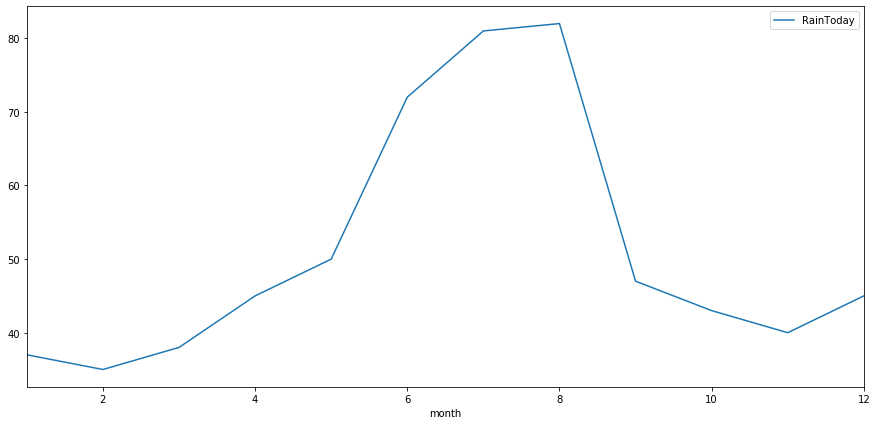

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
df1.groupby(['month']).sum()['RainToday'].plot(ax=ax)
#df1.groupby(['month']).mean()['Humidity3pm'].plot(ax=ax)
leg = ax.legend();


# In the months June,July & August high no of rainy days

# Plotting daily variables to see the relationship with the following day rainfall

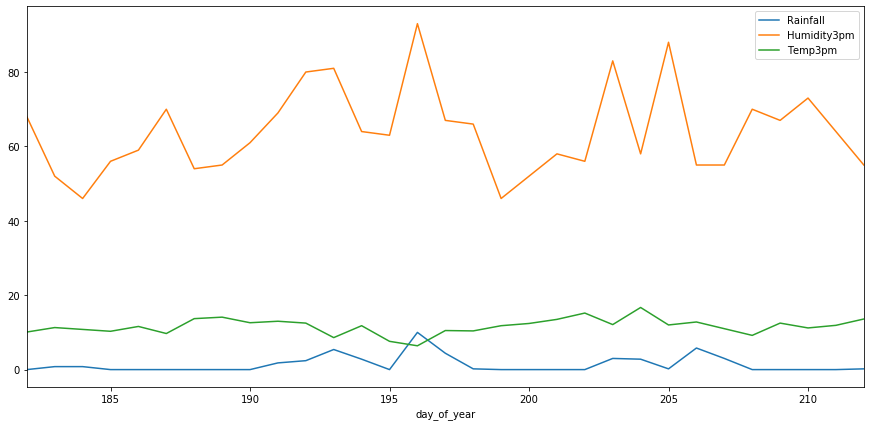

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
df3.groupby(['day_of_year']).mean()['Rainfall'].plot(ax=ax)
df3.groupby(['day_of_year']).mean()['Humidity3pm'].plot()
df3.groupby(['day_of_year']).mean()['Temp3pm'].plot()
leg = ax.legend();

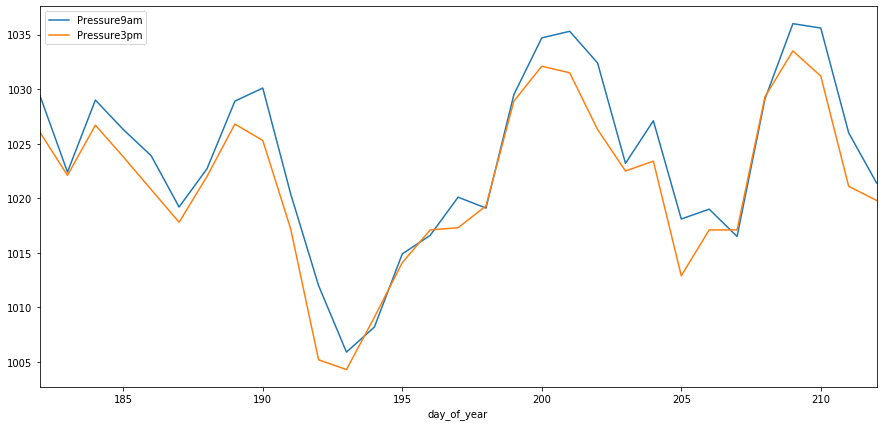

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
#df3.groupby(['day_of_year']).mean()['Rainfall'].plot(ax=ax)
df3.groupby(['day_of_year']).mean()['Pressure9am'].plot()
df3.groupby(['day_of_year']).mean()['Pressure3pm'].plot()
leg = ax.legend();

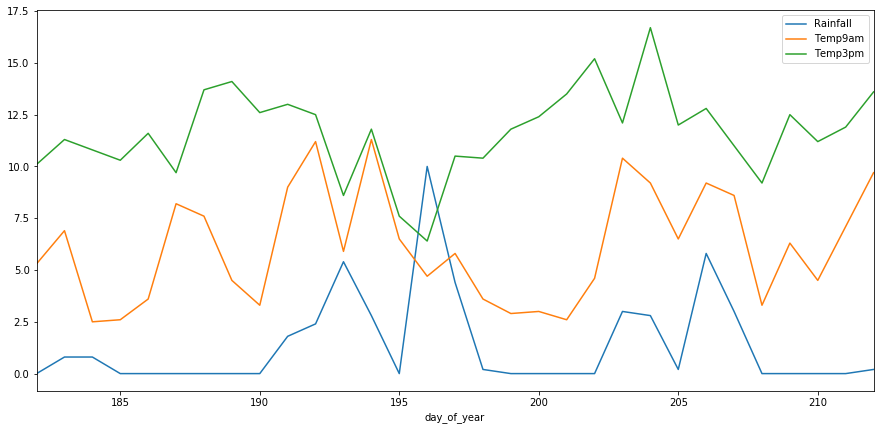

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
df3.groupby(['day_of_year']).mean()['Rainfall'].plot(ax=ax)
df3.groupby(['day_of_year']).mean()['Temp9am'].plot()
df3.groupby(['day_of_year']).mean()['Temp3pm'].plot()
leg = ax.legend()

#  No of rainy days reported every year for Albury

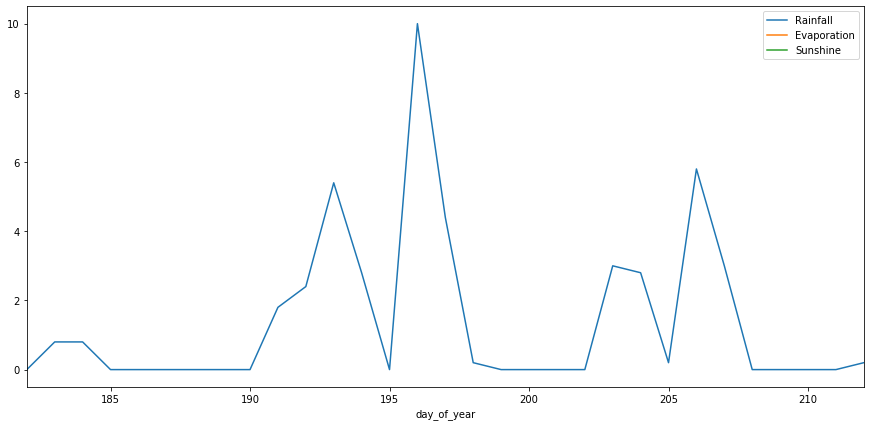

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
df3.groupby(['day_of_year']).mean()['Rainfall'].plot(ax=ax)
df3.groupby(['day_of_year']).mean()['Evaporation'].plot()
df3.groupby(['day_of_year']).mean()['Sunshine'].plot()
leg = ax.legend()

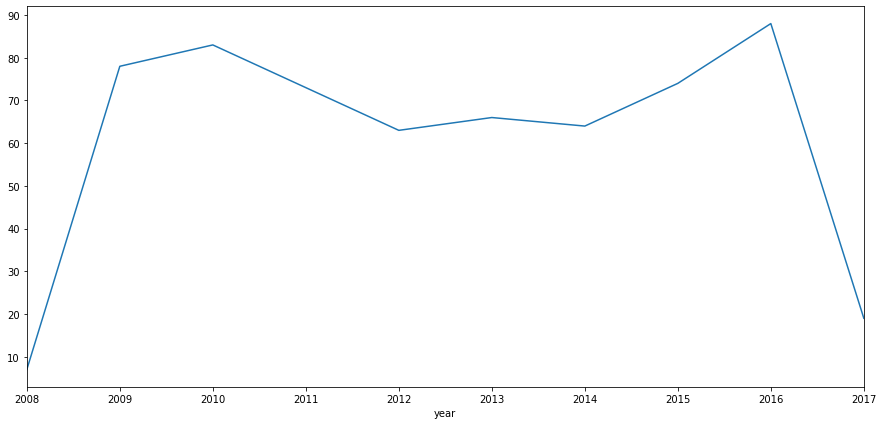

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
df1.groupby(['year']).sum()['RainToday'].plot(ax=ax)